<a href="https://colab.research.google.com/github/gkalwaysno1/IEEE_OSPI/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Enter image url : /content/drive/MyDrive/IEEE_OSPI_datasets/Brain/dataset/Testing/glioma/Te-glTr_0000.jpg


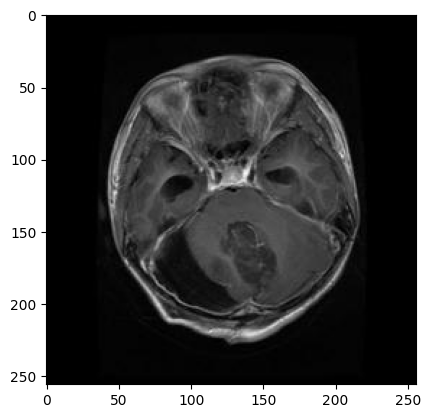

In [ ]:

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
path=input("Enter image url : ")
img=cv2.imread(path)
plt.imshow(img)
plt.show()

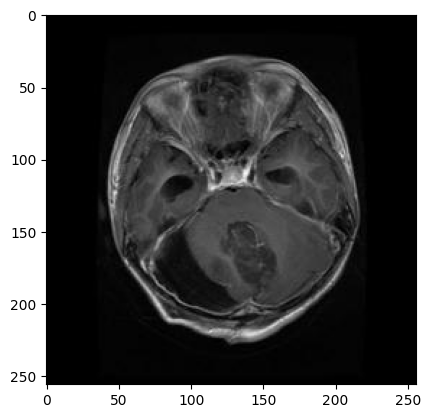

In [ ]:
resz=tf.image.resize(img,(256,256))
plt.imshow((resz.numpy().astype(int)))
plt.show()

In [ ]:
import numpy as np
np.expand_dims(resz,0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [ ]:
from keras.models import load_model
import os
new_model=load_model(os.path.join('/content/drive/MyDrive/Models','ens.h5'))

In [ ]:
def ind(lst):
  for i in range(4):
    if(max(lst)==lst[i]):
      return i

In [ ]:
def test(model,image):
  final=model.predict(np.expand_dims(image/255,0))
  # final.tolist()
  return ind(final[0])

In [ ]:
k1=test(new_model,resz)

1/1 [==============================] - 0s 318ms/step


In [ ]:

major_labels=os.listdir('/content/drive/MyDrive/IEEE_OSPI_datasets')
model_paths="/content/drive/MyDrive/Models/Subpart_model"
subfold=major_labels[k1]
print("The image belongs to ",subfold)

The image belongs to  Brain_Tumor


In [ ]:
min_labels=os.listdir(f"/content/drive/MyDrive/IEEE_OSPI_datasets/{subfold}/dataset/Training")
m1=os.listdir("/content/drive/MyDrive/Models/Subpart_model")
n1=load_model(os.path.join('/content/drive/MyDrive/Models/Subpart_model',m1[k1]))

In [ ]:
k2=test(n1,resz)
print("The person is having a condition of ",min_labels[k2])

1/1 [==============================] - 1s 508ms/step
The person is having a condition of  glioma
